# EDA CANDIDAT

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


In [44]:
df = pd.read_csv('../data/OnBigTable/one_big_table.csv.gz', compression='gzip') 
df.head()

,ID_LOCAL,TITLE,DESCRIPTION,TYPE_CONTRAT,CODE_DOMAINE,NOM_DOMAINE,CODE_POSTAL,VILLE,DEPARTEMENT,REGION,...,TYPE_SENIORITE,CODE_ROME,NOM_METIER,NOM_ENTREPRISE,CATEGORIE_ENTREPRISE,DATE_CREATION_ENTREPRISE,COMPETENCES,TYPES_COMPETENCES,SOFTSKILLS_SUMMARY,SOFTSKILLS_DETAILS
0,5168154800,Business Intelligence Analyst - (H/F) - En alt...,Business Intelligence Analyst - (H/F) - En alt...,Alternance,NaN,NaN,62170.0,Wailly-Beaucamp,Pas-de-Calais,Hauts-de-France,...,NaN,M1806,NaN,OPENCLASSROOMS,ETI,2007-01-20,Business Intelligence,Data Analytics,"Avoir l’esprit d’équipe, Capacité d’adaptation...",Avoir une propension à agencer et structurer s...
1,5091456057,CONSULTANT BUSINESS INTELLIGENCE / INFORMATIQU...,Description du poste : Nous recherchons un con...,CDI,K14,Conception et mise en oeuvre des politiques pu...,31500.0,Toulouse,Haute-Garonne,Occitanie,...,NaN,M1806,NaN,KAPA IT,PME,2008-03-28,NaN,NaN,"Avoir l’esprit d’équipe, Capacité d’adaptation...",Avoir une propension à agencer et structurer s...
2,5109227,Consultant fonctionnel ERP (H/F),Description du poste : En tant qu'organisateur...,CDI,H12,"Conception, recherche, études et développement",69110.0,Sainte-Foy-lès-Lyon,Rhône,Auvergne-Rhône-Alpes,...,Senior,M1806,NaN,NaN,NaN,NaN,Supply Chain Management,Supply Chain,"Avoir l’esprit d’équipe, Capacité d’adaptation...",Avoir une propension à agencer et structurer s...
3,5149049679,Inspecteur Ouvrages d'Art (débutant/Expériment...,Description du poste Dans un contexte de crois...,CDI,H12,"Conception, recherche, études et développement",37320.0,Truyes,Indre-et-Loire,Centre-Val de Loire,...,NaN,M1807,NaN,SITES,PME,2009-10-28,Chef,Configuration Management,"Avoir l’esprit d’équipe, Capacité d’adaptation...",Avoir une propension à agencer et structurer s...
4,4955082539,Maçon Finisseur H/F,Intégrée à une Holding de plus de 1000 collabo...,CDI,NaN,NaN,75008.0,Paris,Paris,Île-de-France,...,NaN,M1807,NaN,NaN,NaN,NaN,NaN,NaN,"Avoir l’esprit d’équipe, Capacité d’adaptation...",Avoir une propension à agencer et structurer s...


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34541 entries, 0 to 34540
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_LOCAL                   34541 non-null  object 
 1   TITLE                      34541 non-null  object 
 2   DESCRIPTION                34541 non-null  object 
 3   TYPE_CONTRAT               20656 non-null  object 
 4   CODE_DOMAINE               26701 non-null  object 
 5   NOM_DOMAINE                26701 non-null  object 
 6   CODE_POSTAL                34538 non-null  float64
 7   VILLE                      34538 non-null  object 
 8   DEPARTEMENT                34538 non-null  object 
 9   REGION                     34538 non-null  object 
 10  PAYS                       34538 non-null  object 
 11  LATITUDE                   34538 non-null  float64
 12  LONGITUDE                  34538 non-null  float64
 13  POPULATION                 34528 non-null  flo

In [46]:
missing_values = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({'missing values':missing_values, 'percentage':missing_percent})

In [47]:
missing_df_sorted = missing_df.sort_values('percentage',ascending=False)

In [48]:
missing_df_sorted

,missing values,percentage
NOM_METIER,34541,100.000000
TYPE_TELETRAVAIL,30804,89.180973
SOFTSKILLS_DETAILS,25224,73.026259
SOFTSKILLS_SUMMARY,25224,73.026259
TYPES_COMPETENCES,23954,69.349469
COMPETENCES,23954,69.349469
TYPE_SENIORITE,20653,59.792710
TYPE_CONTRAT,13885,40.198605
MOIS_NOM_CREATION,8925,25.838858
WEEK_END_MODIFICATION,8925,25.838858


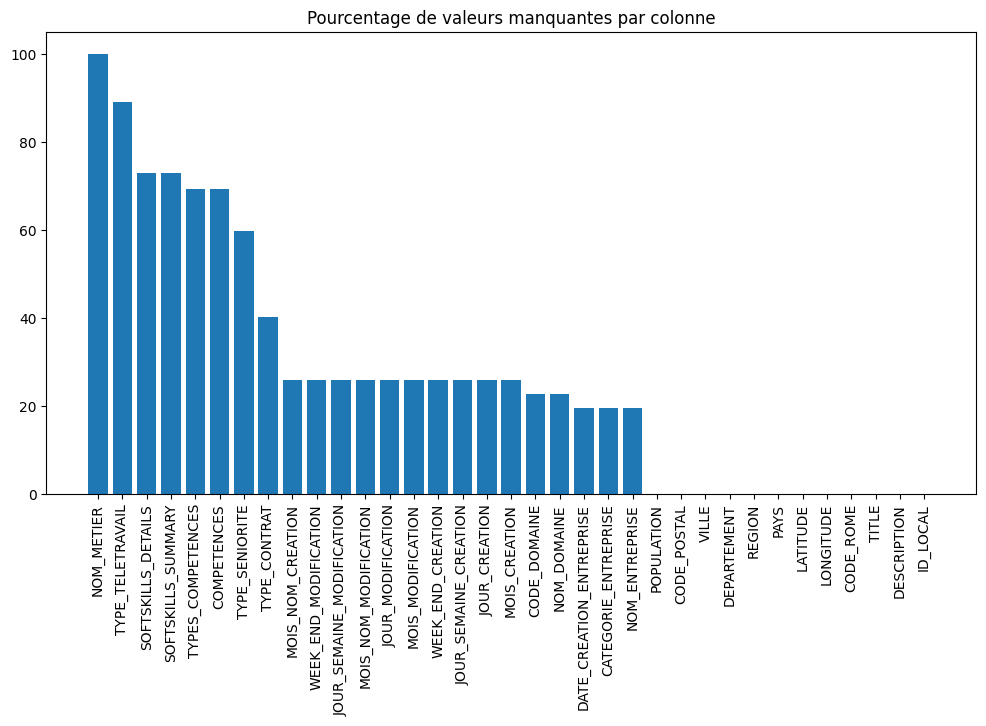

In [49]:
plt.figure(figsize=(12,6))
plt.bar(missing_df_sorted.index,missing_df_sorted.percentage)
plt.xticks(rotation=90)
plt.title('Pourcentage de valeurs manquantes par colonne');

In [50]:
month_count = df['MOIS_NOM_CREATION'].value_counts().head(5)
month_count

MOIS_NOM_CREATION
Avril      17147
Mars        2944
Mai         2928
Février     1652
Janvier      279
Name: count, dtype: int64

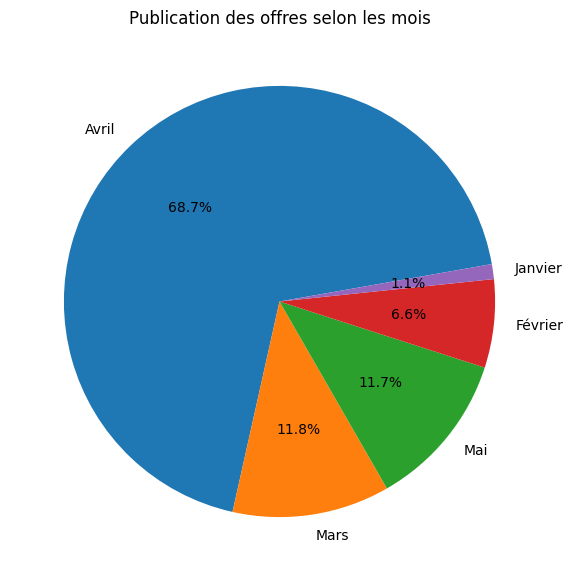

In [51]:
plt.figure(figsize=(7,7))
plt.pie(month_count,labels=month_count.index,autopct='%1.1f%%',startangle=10)
plt.title('Publication des offres selon les mois');

In [52]:
region_counts = df['REGION'].value_counts().head(15)
region_counts

REGION
Île-de-France                 14080
Auvergne-Rhône-Alpes           4221
Occitanie                      2368
Pays de la Loire               2213
Provence-Alpes-Côte d'Azur     2121
Nouvelle-Aquitaine             1942
Bretagne                       1711
Hauts-de-France                1627
Grand Est                      1600
Centre-Val de Loire             915
Normandie                       889
Bourgogne-Franche-Comté         582
Guyane                          112
La Réunion                       51
Martinique                       39
Name: count, dtype: int64

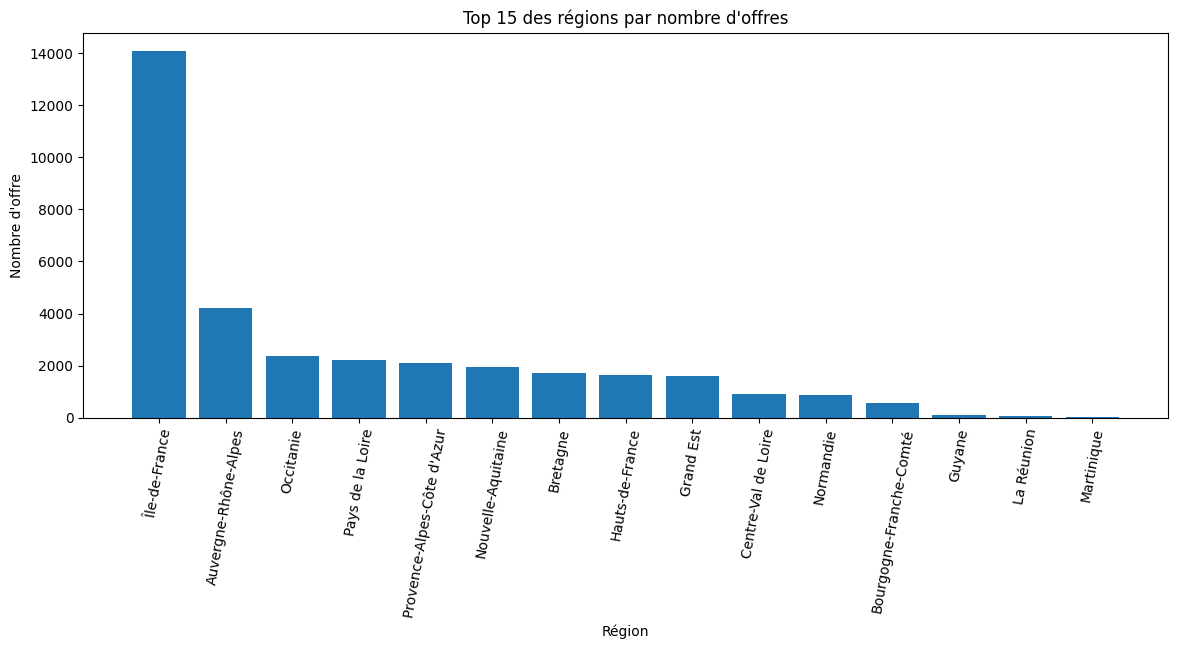

In [53]:
plt.figure(figsize=(14, 5))
plt.bar(region_counts.index,region_counts.values)
plt.title('Top 15 des régions par nombre d\'offres')
plt.xlabel('Région')
plt.ylabel('Nombre d\'offre')
plt.xticks(rotation=80);

/var/folders/tj/l36w8z3901ddy038kdl26mp80000gn/T/ipykernel_2046/786774030.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend();


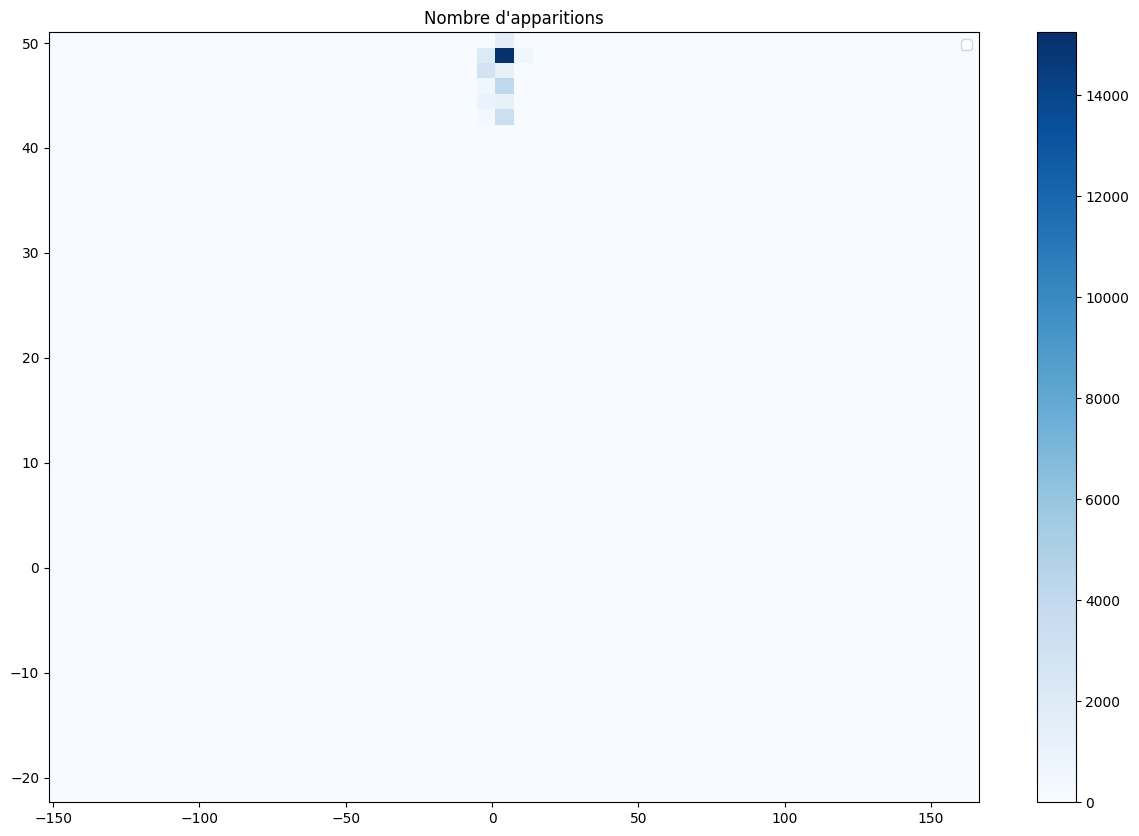

In [54]:
plt.figure(figsize=(15, 10))

plt.hist2d(df['LONGITUDE'].dropna(), df['LATITUDE'].dropna(),cmap='Blues',bins=50)
plt.colorbar()
plt.title('Nombre d\'apparitions')
plt.legend();

In [55]:
domain_counts = df['NOM_DOMAINE'].value_counts().head(15)
domain_counts

NOM_DOMAINE
Conception, recherche, études et développement                                   2750
Affaires et support technique client                                             2453
Systèmes d'information et de télécommunication                                   1678
Animation d'activités de loisirs                                                 1373
Direction, encadrement et pilotage de fabrication et production industrielles    1026
Hygiène Sécurité Environnement -HSE- industriels                                  990
Conception et mise en oeuvre des politiques publiques                             982
Mécanique, travail des métaux et outillage                                        841
Direction d'entreprise                                                            815
Développement territorial et emploi                                               723
Gestion et direction                                                              635
Gestion administrative banque et assurance

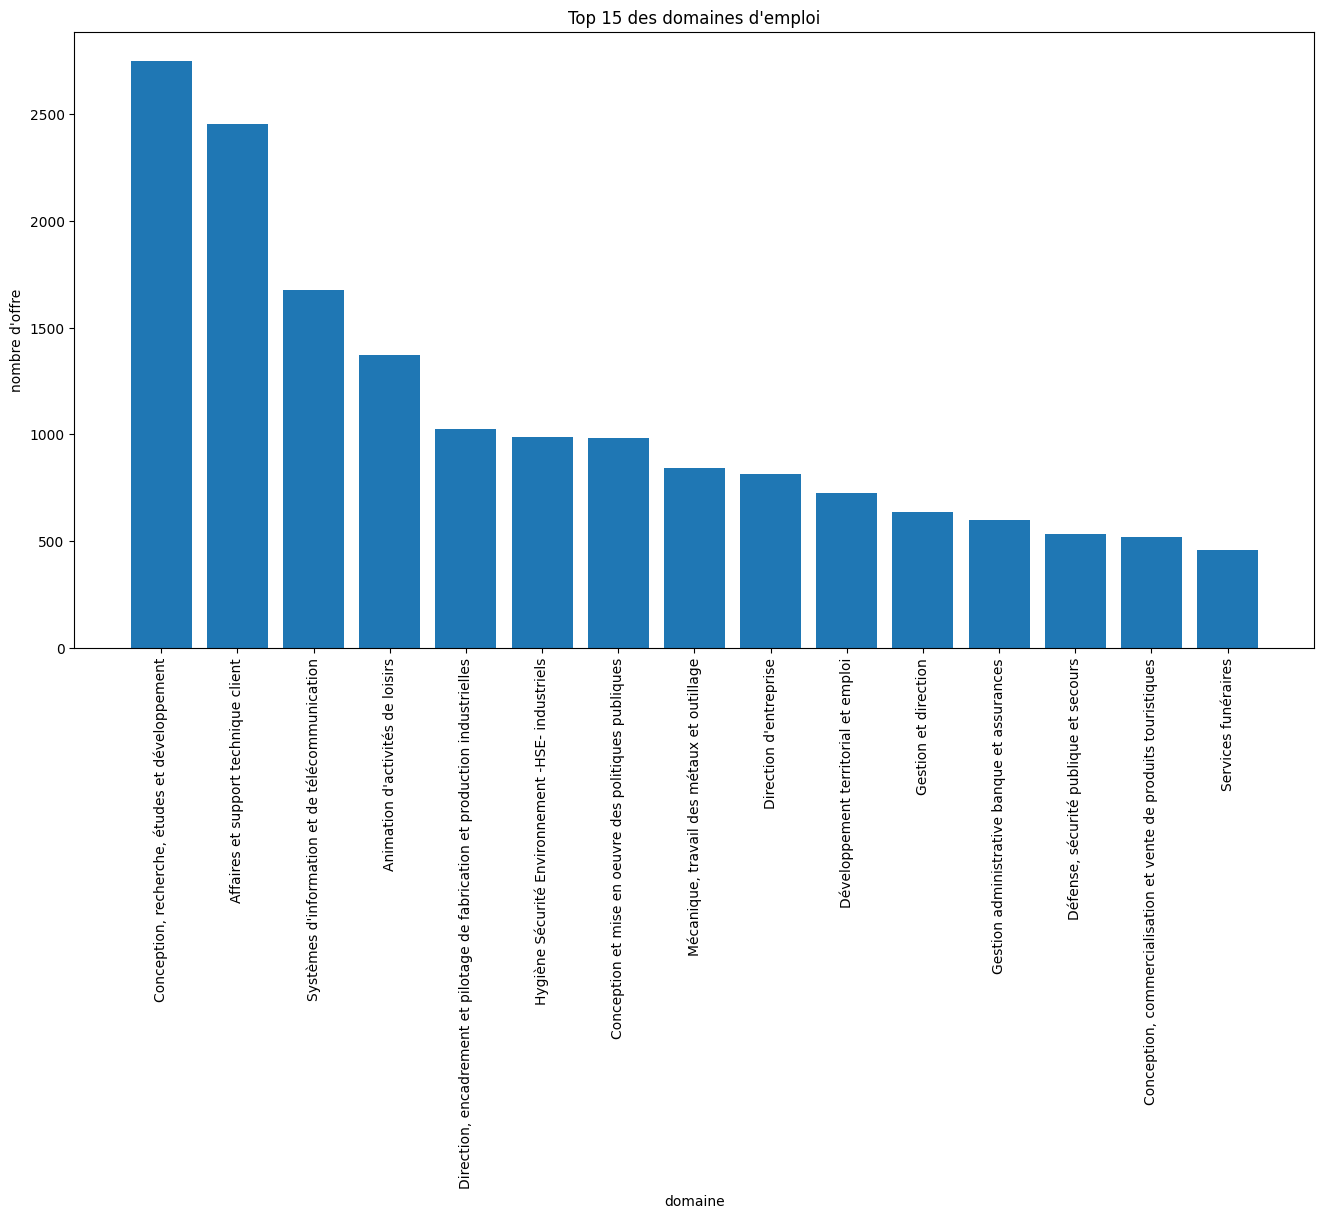

In [56]:
# Top domaines d'emploi
plt.figure(figsize=(16, 8))
plt.bar(domain_counts.index,domain_counts.values)
plt.title('Top 15 des domaines d\'emploi')
plt.xlabel('domaine')
plt.ylabel('nombre d\'offre')
plt.xticks(rotation=90);

In [57]:
company_counts = df['NOM_ENTREPRISE'].value_counts().head(15)
company_counts

NOM_ENTREPRISE
LTD                         944
FORUMS DU CHAMP LACANIEN    443
CGI                         344
KINOUGARDE                  341
MANPOWER                    327
SAFRAN                      268
ISCOD                       263
MICHAEL KORS (FRANCE)       246
TN AMERICAS LLC             235
THALES                      234
CGI FRANCE                  233
CRIT                        208
OPENCLASSROOMS              208
NAVAL GROUP                 174
RANDSTAD                    174
Name: count, dtype: int64

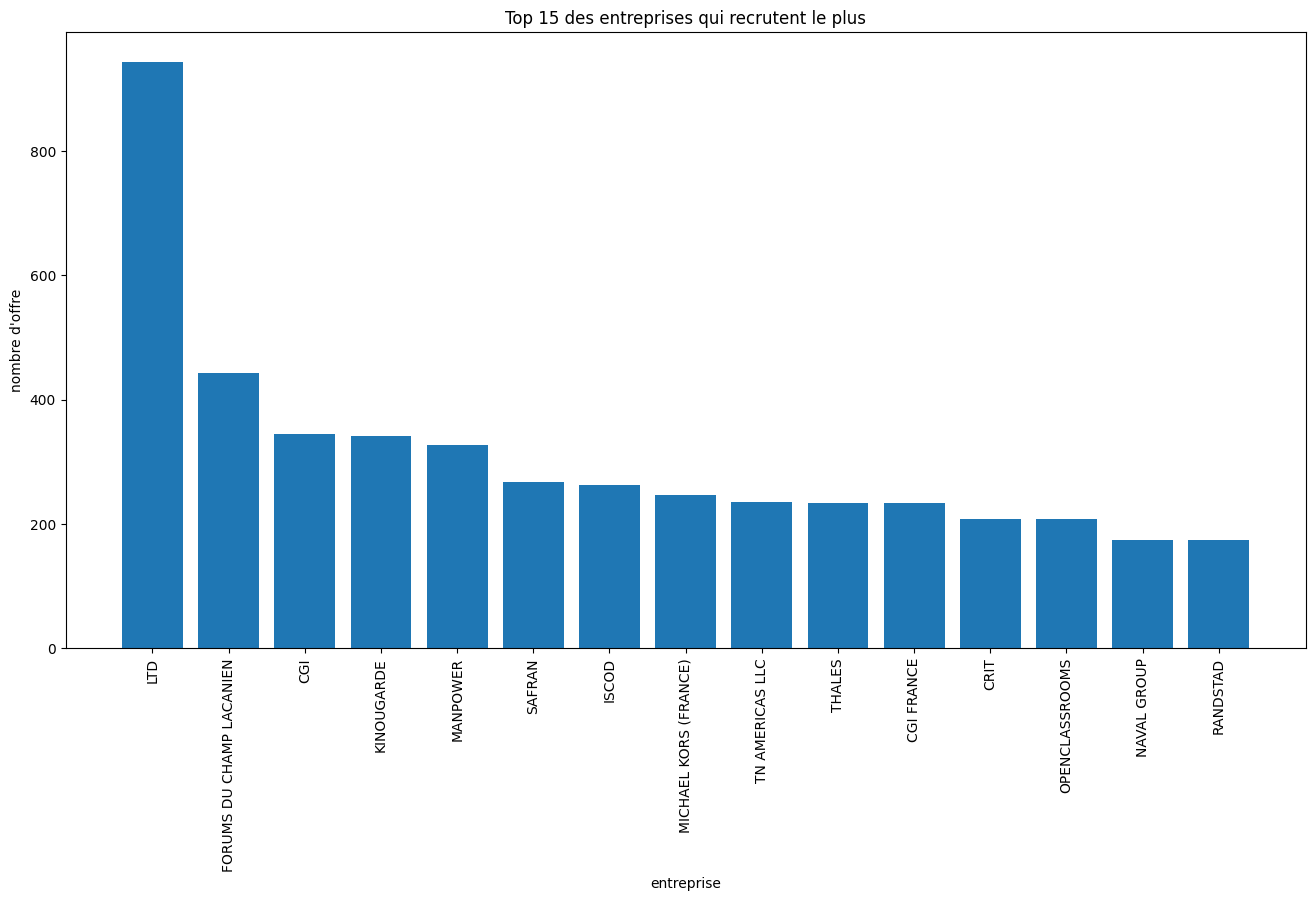

In [58]:
plt.figure(figsize=(16, 8))
plt.bar(company_counts.index, company_counts.values)
plt.title('Top 15 des entreprises qui recrutent le plus')
plt.xlabel('entreprise')
plt.ylabel('nombre d\'offre')
plt.xticks(rotation=90);


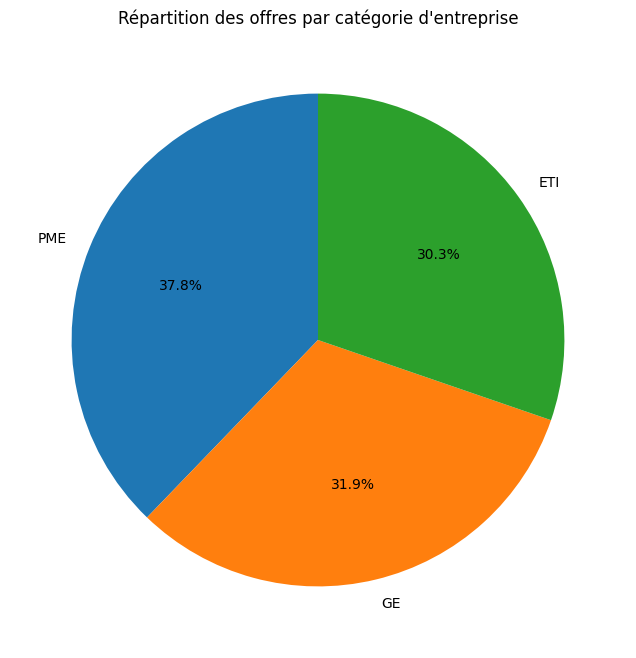

In [59]:
plt.figure(figsize=(12, 8))
category_counts = df['CATEGORIE_ENTREPRISE'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', 
        startangle=90)
plt.title('Répartition des offres par catégorie d\'entreprise');

In [74]:
coderome_counts = df['CODE_ROME'].value_counts().head(15)

In [75]:
coderome_counts

CODE_ROME
M1815    5546
M1811    4341
M1810    3334
M1818    2988
M1806    2973
M1801    2741
M1827    2380
M1822    1390
M1808    1313
M1805    1249
M1813    1139
M1403     937
M1807     736
M1816     661
M1802     533
Name: count, dtype: int64

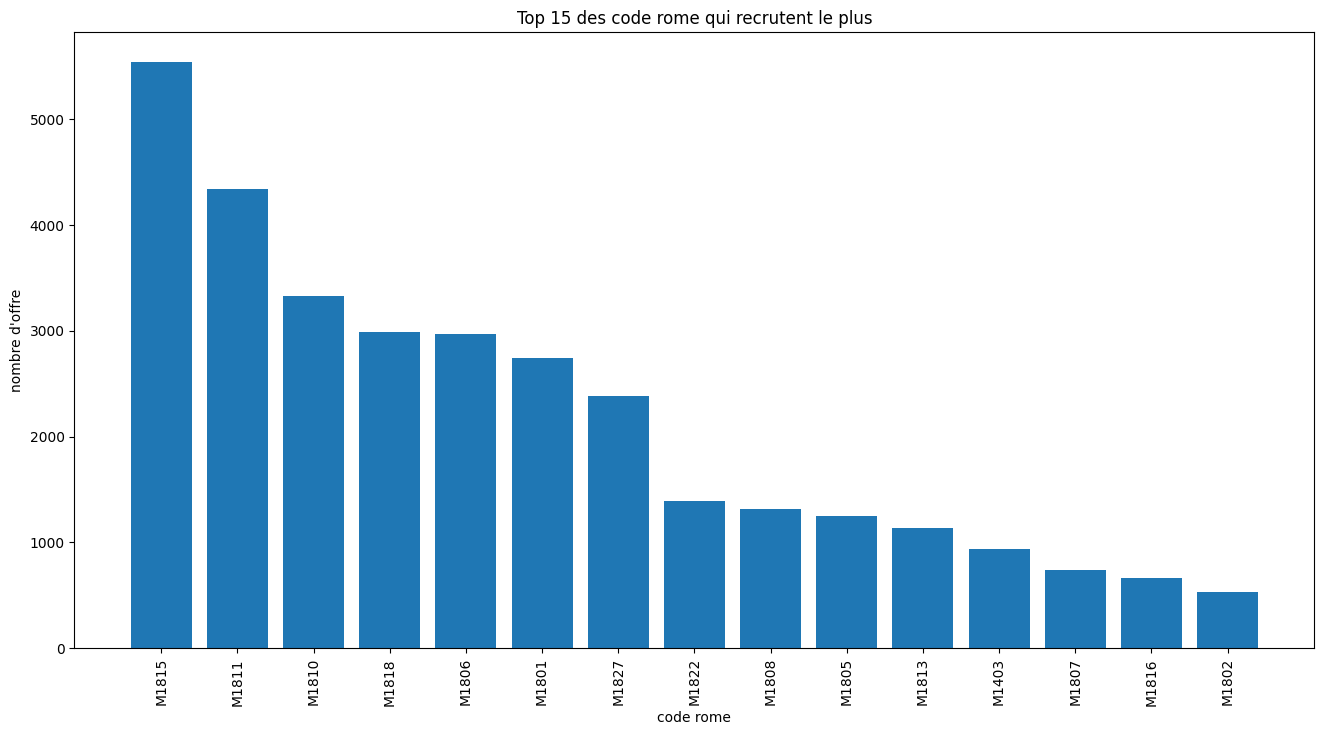

In [76]:
plt.figure(figsize=(16, 8))
plt.bar(coderome_counts.index, coderome_counts.values)
plt.title('Top 15 des code rome qui recrutent le plus')
plt.xlabel('code rome')
plt.ylabel('nombre d\'offre')
plt.xticks(rotation=90);


In [79]:
coderome_counts_df = df[df['CODE_ROME'].isin(coderome_counts.index)]
company_counst_df = df[df['NOM_ENTREPRISE'].isin(company_counts.index)]

In [80]:
entrerprise_coderome = pd.crosstab(company_counst_df['NOM_ENTREPRISE'], coderome_counts_df['CODE_ROME']).head(15)
entrerprise_coderome

CODE_ROME,M1403,M1801,M1802,M1805,M1806,M1807,M1808,M1810,M1811,M1813,M1815,M1816,M1818,M1822,M1827
NOM_ENTREPRISE,,,,,,,,,,,,,,,
CGI,0,35,0,11,84,0,0,4,56,5,22,0,75,6,40
CGI FRANCE,1,9,0,0,65,0,1,0,43,8,66,1,2,4,26
CRIT,0,10,0,8,0,6,8,51,0,0,114,5,0,0,0
FORUMS DU CHAMP LACANIEN,3,20,2,56,42,1,1,9,57,19,24,8,61,24,89
ISCOD,20,24,0,1,15,3,7,59,29,0,70,24,0,0,7
KINOUGARDE,0,0,0,0,0,0,0,0,0,0,341,0,0,0,0
LTD,505,0,0,1,3,55,30,26,9,2,4,0,6,293,0
MANPOWER,16,28,0,10,12,41,6,99,4,8,44,42,8,4,5
MICHAEL KORS (FRANCE),3,41,1,8,13,3,10,11,57,12,26,1,11,11,19


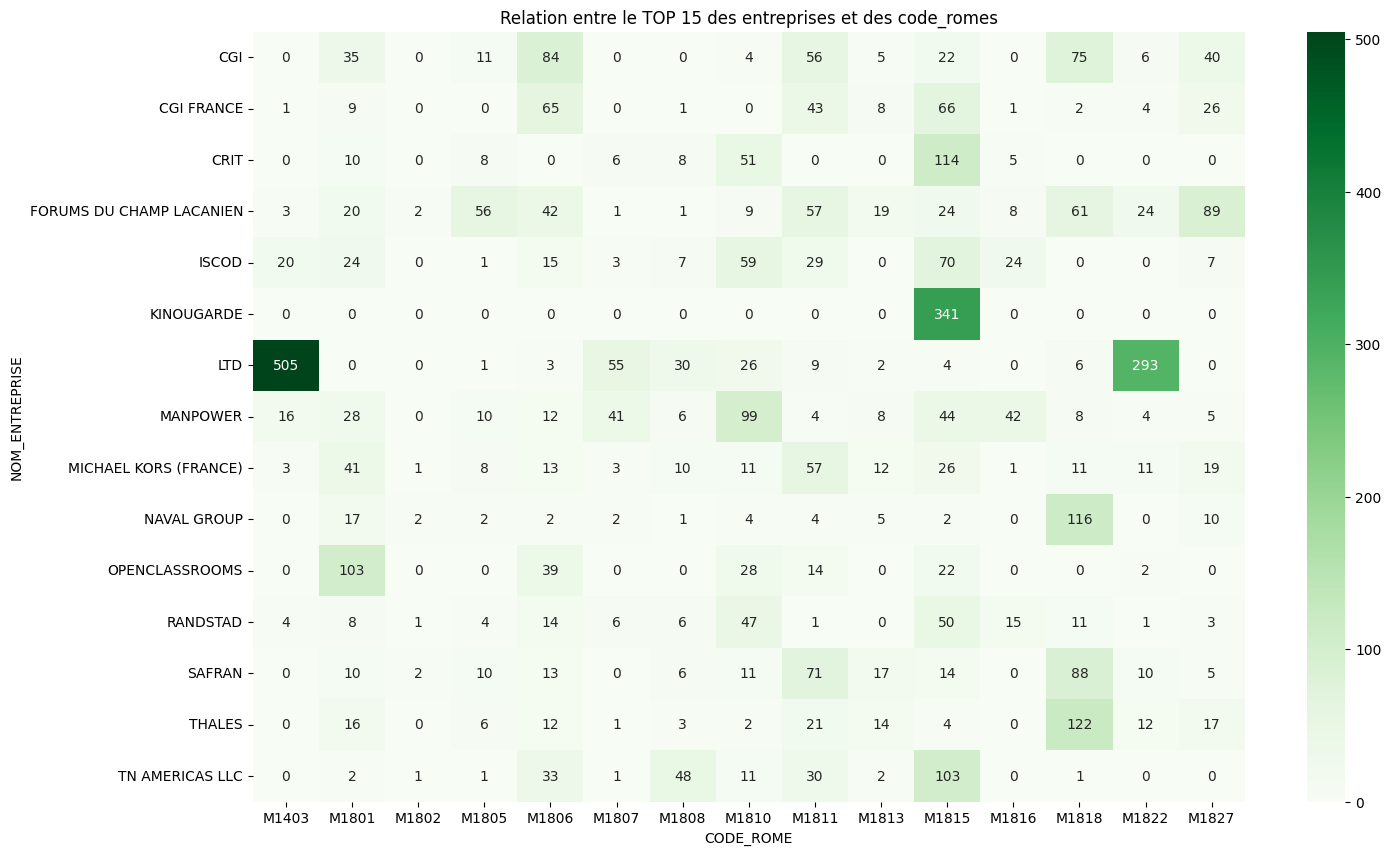

In [88]:
plt.figure(figsize=(16, 10))
sns.heatmap(entrerprise_coderome, cmap='Greens', annot=True, fmt='d')
plt.title('Relation entre le TOP 15 des entreprises et des code_romes');

In [83]:
domain_counts_df = df[df['NOM_DOMAINE'].isin(domain_counts.index)]

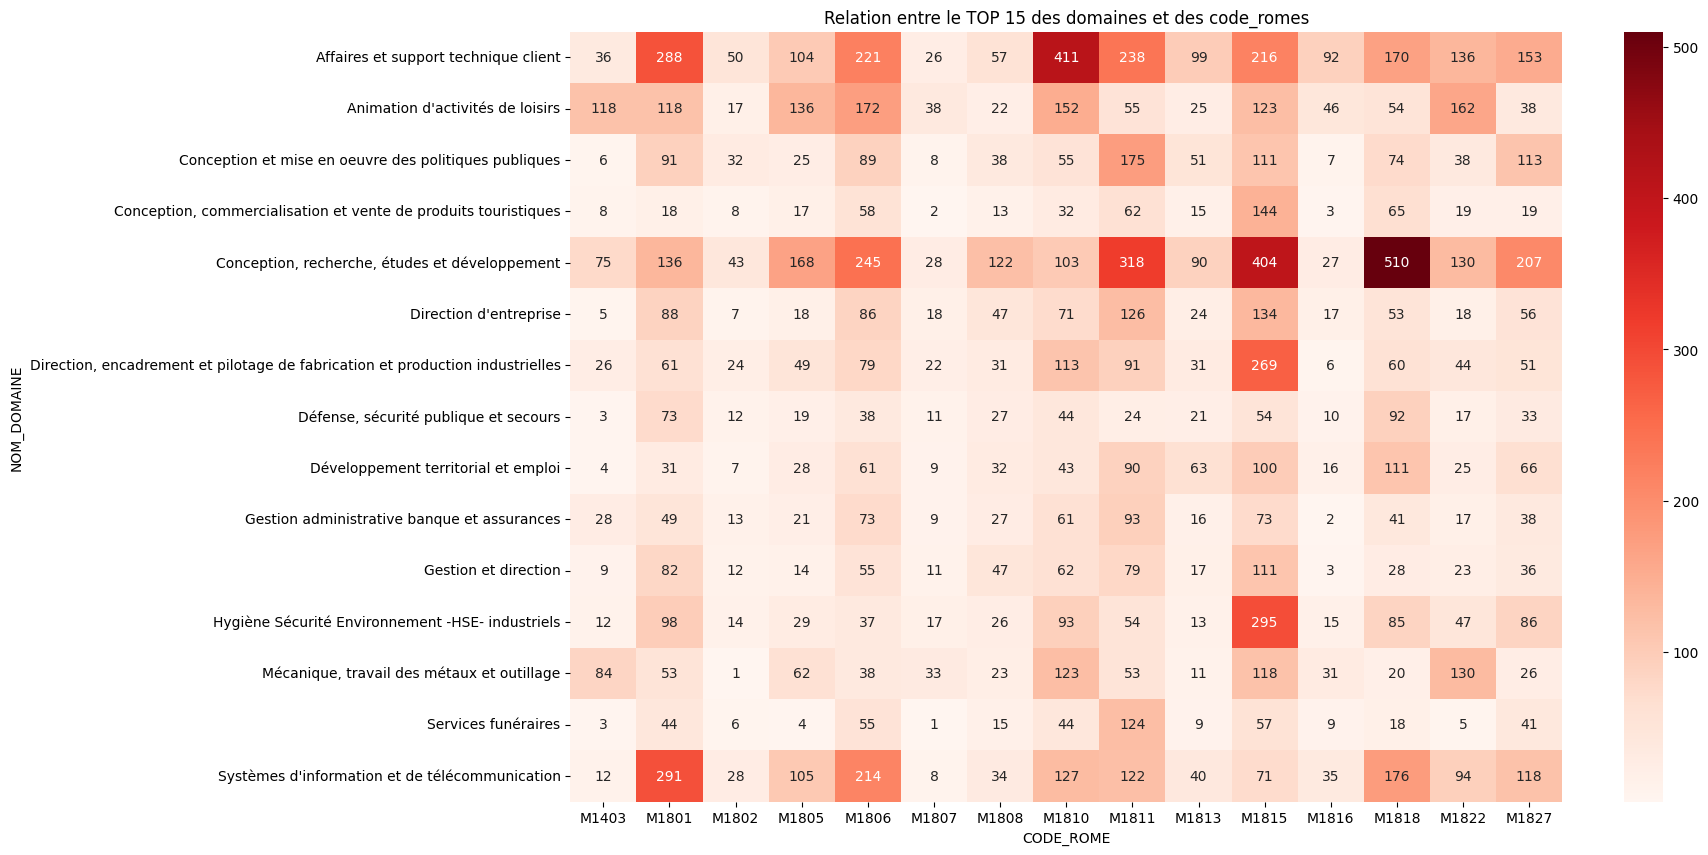

In [87]:
domaine_coderome = pd.crosstab(domain_counts_df['NOM_DOMAINE'], coderome_counts_df['CODE_ROME']).head(15)
plt.figure(figsize=(16, 10))
sns.heatmap(domaine_coderome, cmap='Reds', annot=True, fmt='d')
plt.title('Relation entre le TOP 15 des domaines et des code_romes');